In [1]:
# Visualization tools
import matplotlib.pyplot as plt
import numpy as np
# Math tools
import math

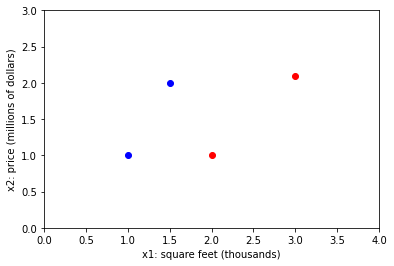

In [2]:
data_x1 = [1, 1.5, 2, 3]
data_x2 = [1, 2, 1, 2.1]
a = plt.subplot(1, 1, 1)
plt.xlabel("x1: square feet (thousands)")
plt.ylabel("x2: price (millions of dollars)")
plt.plot(data_x1[:2], data_x2[:2], "bo")
plt.plot(data_x1[2:], data_x2[2:], "ro")
# c = np.linspace(0, 4)
# plt.plot(c, 0.75*c)
_ = plt.axis([0, 4, 0, 3])

In [3]:
w1 = 0
w2 = 0
b = 0

In [4]:
dataset = [[1, 1, 0],
           [1.5, 2, 0],
           [2, 1, 1], 
           [3, 2.1, 1]]

In [5]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [6]:
def error(y, x1, x2, w1, w2, b):
    prediction = sigmoid(w1 * x1 + w2 * x2 + b)
    return -(y * math.log(prediction) + (1 - y) * math.log(1 - prediction))

In [7]:
def gradients(y, x1, x2, w1, w2, b):
    a = w1 * x1 + w2 * x2 + b
    s = sigmoid(a)
    da = s - y
    return [da * x1, da * x2, da]

In [8]:
iterations = 5000
learning_rate = 0.01
N = len(dataset)
epsilon = 1e-9

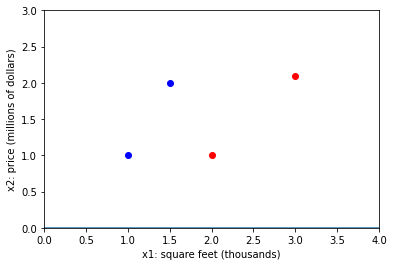

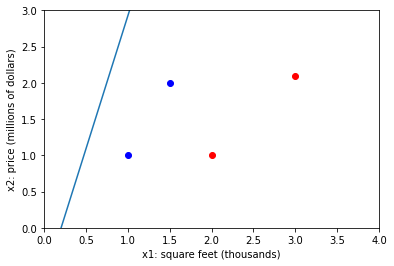

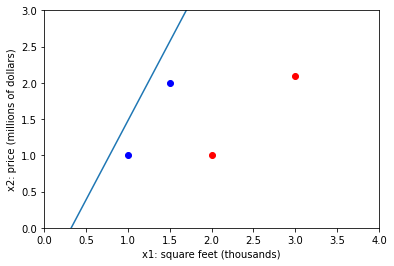

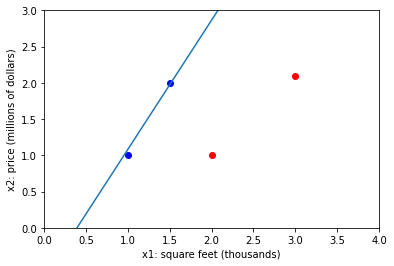

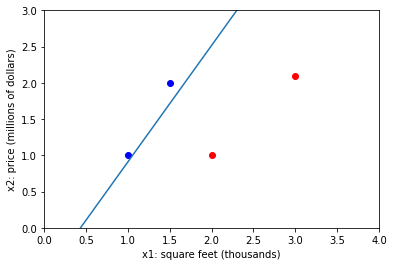

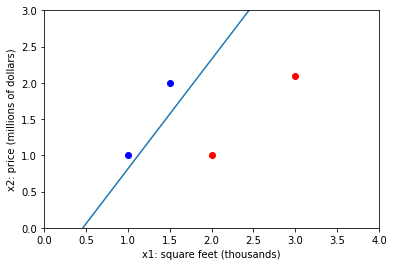

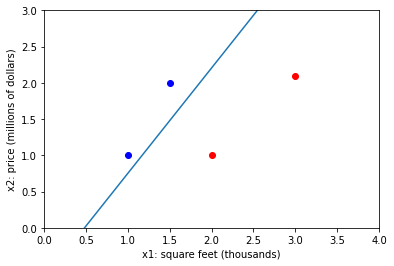

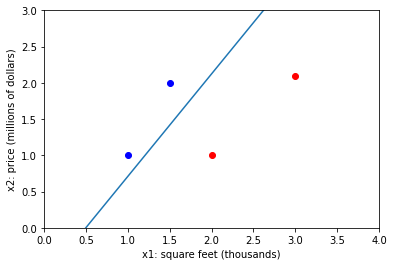

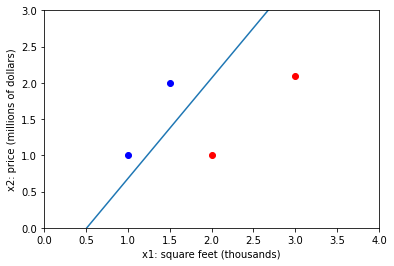

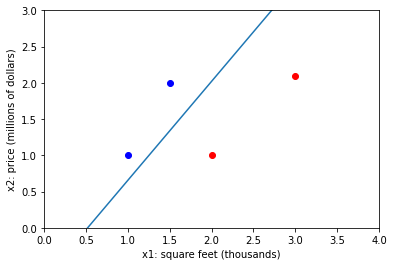

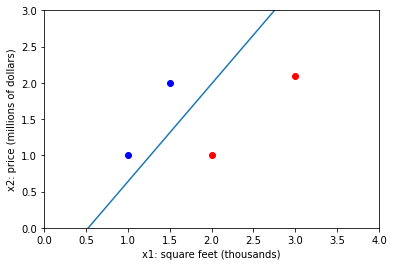

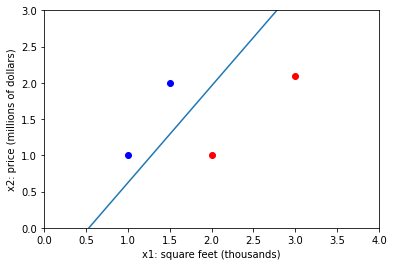

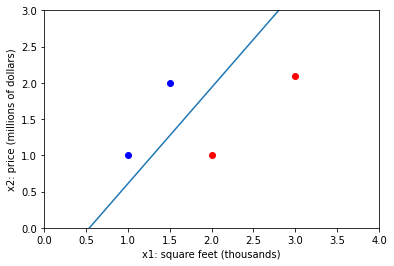

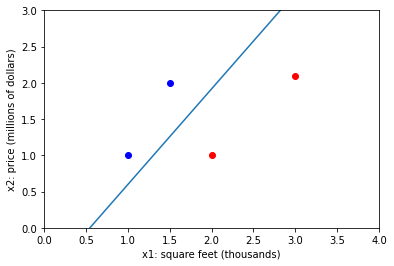

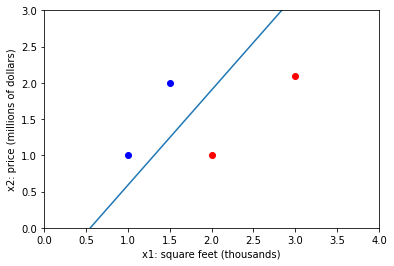

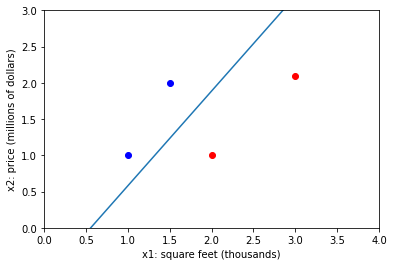

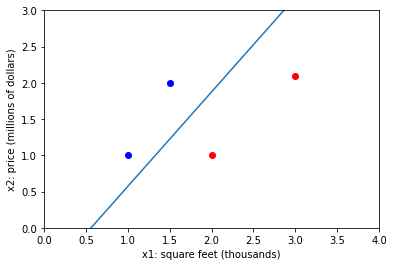

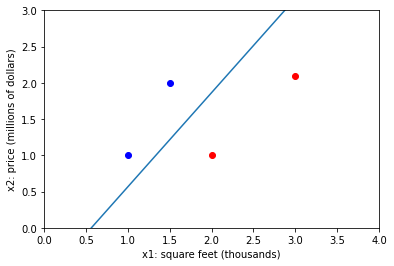

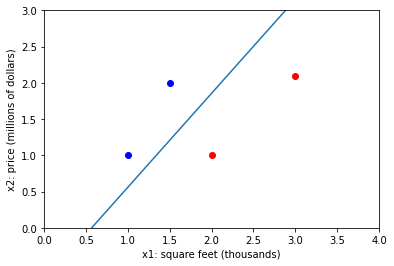

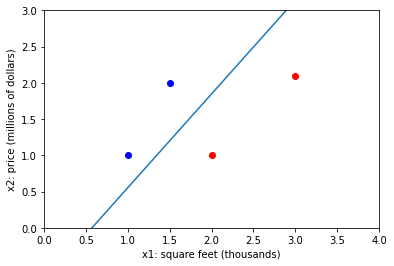

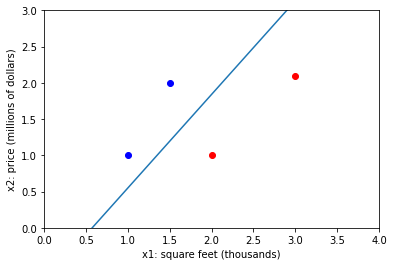

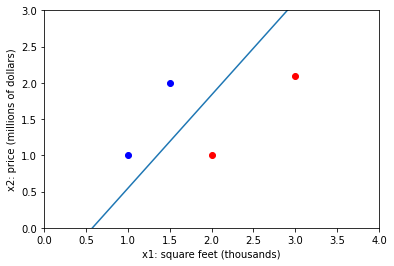

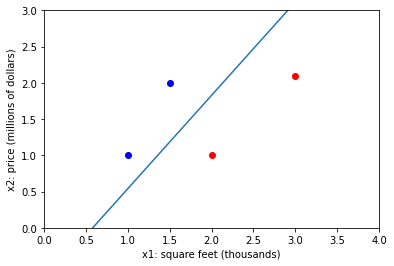

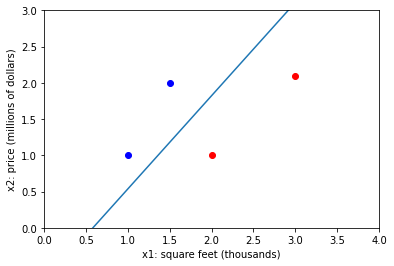

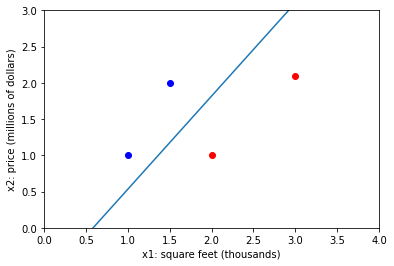

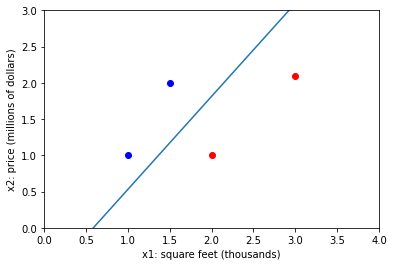

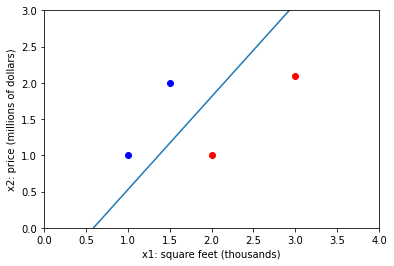

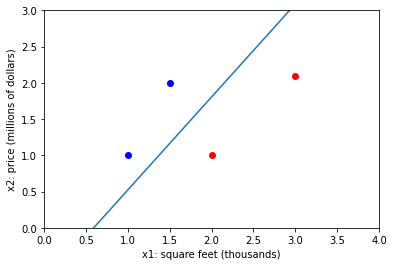

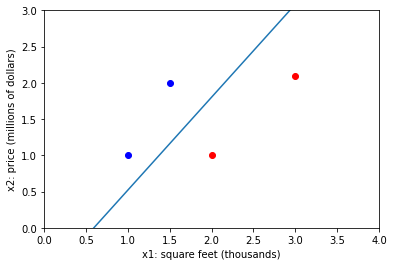

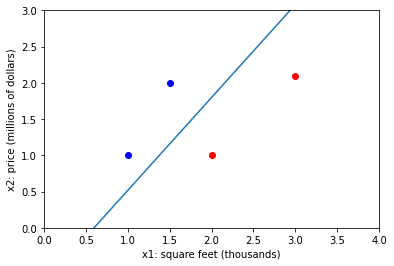

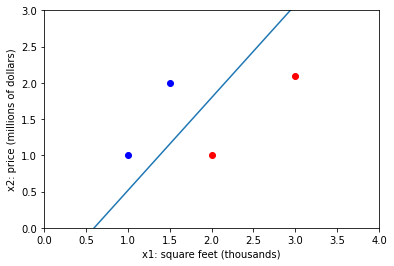

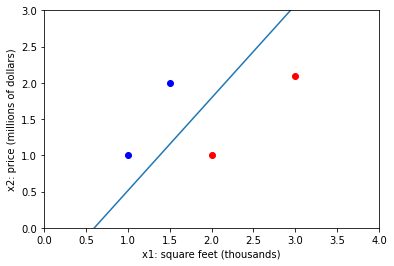

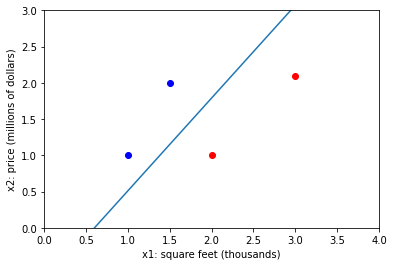

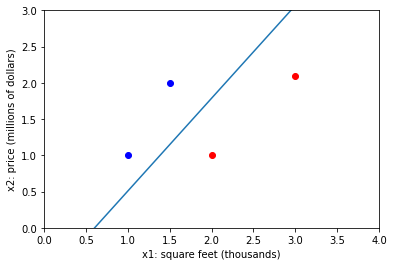

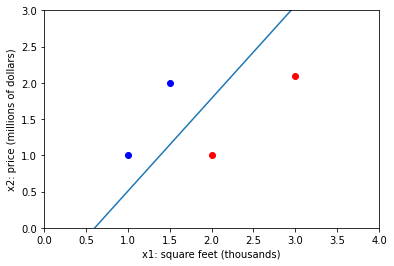

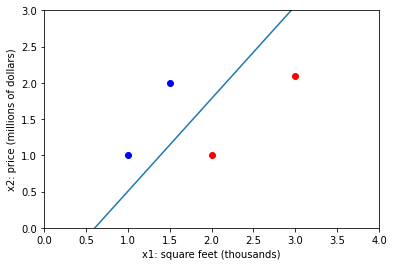

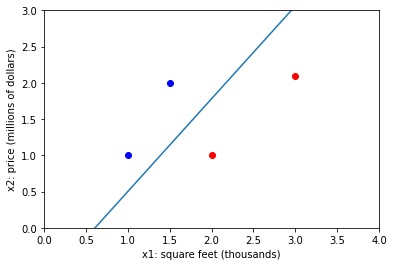

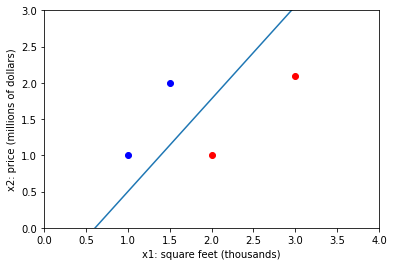

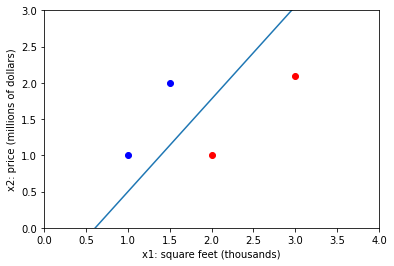

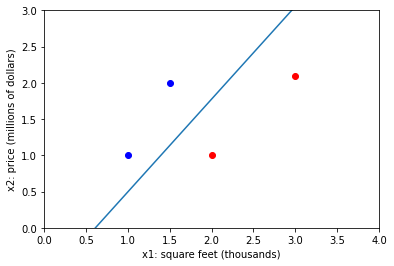

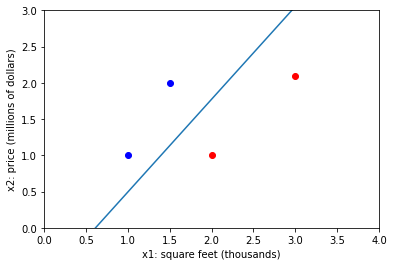

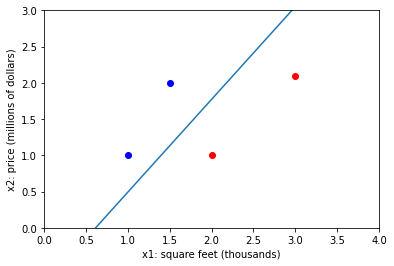

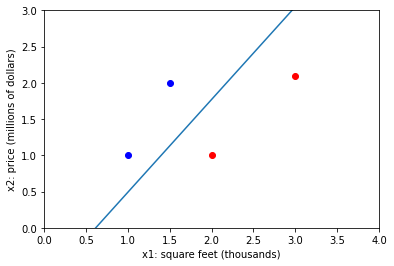

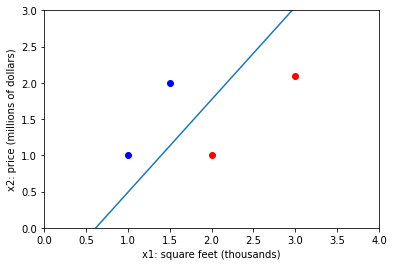

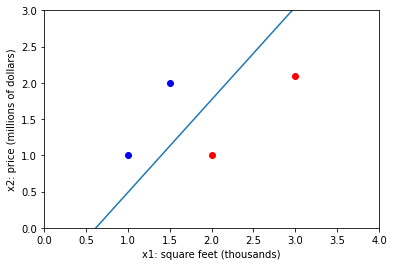

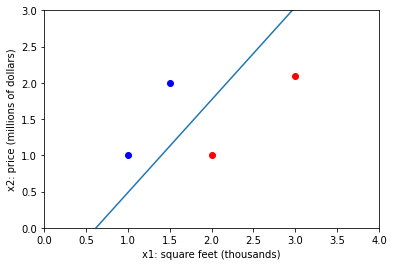

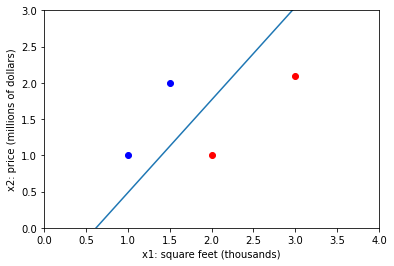

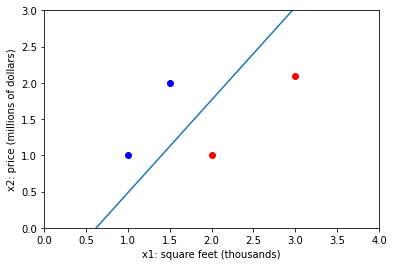

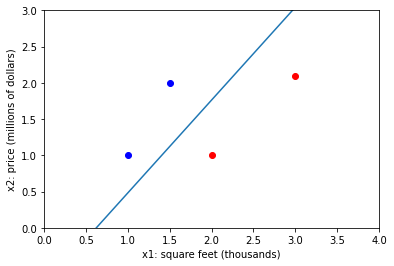

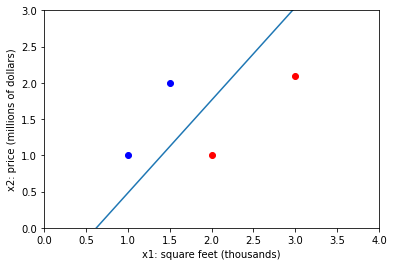

In [9]:
# Watch the line change over time! (In a Colab Notebook, it actually looks like the line in moving in an animation)
for i in range(iterations):
    if i % 100 == 0:
      a = plt.subplot(1, 1, 1)
      plt.xlabel("x1: square feet (thousands)")
      plt.ylabel("x2: price (millions of dollars)")
      plt.plot(data_x1[:2], data_x2[:2], "bo")
      plt.plot(data_x1[2:], data_x2[2:], "ro")
      c = np.linspace(0, 4)
      plt.plot(c, -(w1/(w2 + epsilon))*c -(b/(w2 + epsilon)))
      _ = plt.axis([0, 4, 0, 3])
      plt.show()
    dw1 = 0
    dw2 = 0
    db = 0
    curr_loss = 0
    for data in dataset:
        x1, x2, y = data
        grads = gradients(y, x1, x2, w1, w2, b)
        dw1 += grads[0]
        dw2 += grads[1]
        db += grads[2]
        curr_loss += error(y, x1, x2, w1, w2, b)
    dw1 = dw1 / N # scale everything to be the average over the data
    dw2 = dw2 / N
    db = db / N
    curr_loss = curr_loss / N
    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    b = b - learning_rate * db
    # print(w1, w2, b, curr_loss) # print progress: See output in github repository

Sample output printed progress for 50 iterations: See sample_progress.txt